In [6]:
import pandas as pd
import numpy as np
import plotly.express as px
from funciones import gen_acum2, between_date2, only_state2, local_extremes, add_regions, gen_acum

In [7]:
df = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv')
df.date = pd.to_datetime(df.date)
dates = df['date']
df.fillna(0, inplace=True)
df.sort_values(by='date', inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.astype('int32', errors='ignore');

### 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común.
 Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo).
 ¿Influye el rango etario en este comportamiento?

In [8]:
df1 = df[['state',
          'date',
          'inpatient_beds_used_covid',
          'total_adult_patients_hospitalized_confirmed_covid',
          'total_pediatric_patients_hospitalized_confirmed_covid'
        ]]
df1['total_hospitailzed_confirmed'] = df[['total_adult_patients_hospitalized_confirmed_covid',
                                            'total_pediatric_patients_hospitalized_confirmed_covid']].sum(axis=1)

C:\Users\AGU\AppData\Local\Temp\ipykernel_12144\90958489.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_hospitailzed_confirmed'] = df[['total_adult_patients_hospitalized_confirmed_covid',


In [9]:
df1 = between_date2(df1,'2020-01-01','2020-06-30')

In [10]:

df1 = gen_acum(df1)

In [11]:
df1_acc = df1.groupby('date').sum()

<AxesSubplot:xlabel='date'>

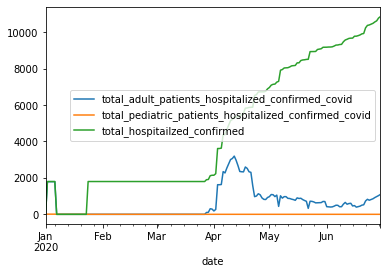

In [12]:
df1_acc.drop(columns=['inpatient_beds_used_covid']).plot()

In [13]:
df1_top = df1.groupby('state').max().nlargest(5,'inpatient_beds_used_covid')
df1_top


,date,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,total_hospitailzed_confirmed
state,,,,,
NY,2020-06-30,14126,5,0,26
PA,2020-06-30,8376,0,0,0
TX,2020-06-30,7171,0,0,0
FL,2020-06-30,7008,0,0,0
CA,2020-06-30,6787,1696,0,2588


RTA : Los 5 estados con mayor ocupacion hospitalaria en los primeros 6 meses del 2020 fueron:
    Nueva York
    Philadelphia
    Texas
    Florida
    California

    Se puede apreciar que la ocupacion de camas por adultos es considerablemente mayor que la de pacientes pediátricos.

### 2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:

Intervalos de crecimiento y decrecimiento
Puntos críticos (mínimos y máximos)

In [14]:
df2 = df[['date','state','inpatient_beds_used_covid']]
df2 = only_state2(df2,'NY')
df2 = between_date2(df2,'2020-03-20','2021-06-15')

In [15]:
lista = local_extremes(df2, 'inpatient_beds_used_covid')

In [16]:
fig = px.line(df2, x='date', y=df2.inpatient_beds_used_covid)
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,255,0.1)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,255,0.1)')

In [17]:
add_regions(df2,fig,lista)

RTA : Se puede ver un ciclo con:

      Aumento pronunciado en el uso de camas en el primer periodo (por comienzo de ingesta de datos?)
      Descenso gradual hasta un minimo el 20 de septiembre
      Para volver a subir pero de manera mas estable hasta el 19 de Enero del 2021 (por medidas restrictivas?) e iniciar un nuevo descenso.

      

### 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [18]:
df3 = df[['date','state','adult_icu_bed_covid_utilization_numerator']]
between_date2(df3,'2020-01-01','2020-12-31')

,date,state,adult_icu_bed_covid_utilization_numerator
0,2020-01-01,NC,0
1,2020-01-01,HI,0
2,2020-01-01,PR,0
3,2020-01-01,AL,0
4,2020-01-01,IN,0
...,...,...,...
16441,2020-12-31,ND,36
16442,2020-12-31,NC,786
16443,2020-12-31,TX,3290
16444,2020-12-31,ID,77


In [19]:
df3 = df3.sort_values(by='adult_icu_bed_covid_utilization_numerator', ascending=False).drop_duplicates('state')
df3.nlargest(5, 'adult_icu_bed_covid_utilization_numerator')

,date,state,adult_icu_bed_covid_utilization_numerator
16942,2021-01-10,CA,4939
29816,2021-09-09,TX,3945
31567,2021-10-12,IL,3809
28939,2021-08-24,FL,3663
17354,2021-01-18,NY,1702


### 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [20]:
df4 = between_date2(df,'2020-01-01','2020-12-31')
df4 = df4[['date','state','total_pediatric_patients_hospitalized_confirmed_covid']]

In [22]:
df4_b = gen_acum2(df4,'total_pediatric_patients_hospitalized_confirmed_covid', 'ACUM')

In [23]:
df4_b[['state','ACUM']].groupby('state').max().sort_values(by='ACUM', ascending=False).head(10)

,ACUM
state,
FL,1428.0
TX,1240.0
PA,1093.0
GA,972.0
TN,872.0
CA,840.0
AZ,831.0
NY,735.0
AL,709.0


### 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

comparar uci de casos confirmados 

In [24]:
df5 = df[['date',
          'state',
          'staffed_adult_icu_bed_occupancy',
          'staffed_pediatric_icu_bed_occupancy',
          'staffed_icu_adult_patients_confirmed_covid',
          'staffed_icu_pediatric_patients_confirmed_covid'
          ]]

In [ ]:
df5['total_ocupadas'] = df5[['staffed_adult_icu_bed_occupancy','staffed_adult_icu_bed_occupancy']].sum(axis=1)
df5.drop(columns=(['staffed_adult_icu_bed_occupancy','staffed_pediatric_icu_bed_occupancy']), inplace=True)
df5['total_confirmados'] = df5[['staffed_icu_adult_patients_confirmed_covid','staffed_icu_pediatric_patients_confirmed_covid']].sum(axis=1)
df5.drop(columns=(['staffed_icu_adult_patients_confirmed_covid','staffed_icu_pediatric_patients_confirmed_covid']), inplace=True)

In [29]:
df5['porcentaje_camas_confirmadas'] = df5['total_confirmados'].div(df5['total_ocupadas'], fill_value=0.0)

C:\Users\AGU\AppData\Local\Temp\ipykernel_12144\3726557217.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
df5

,date,state,total_ocupadas,total_confirmados,porcentaje_camas_confirmadas
0,2020-01-01,NC,0,0,NaN
1,2020-01-01,HI,0,0,NaN
2,2020-01-01,PR,0,0,NaN
3,2020-01-01,AL,0,0,NaN
4,2020-01-01,IN,0,0,NaN
...,...,...,...,...,...
47580,2022-08-04,IA,804,42,0.052239
47581,2022-08-04,PR,986,46,0.046653
47582,2022-08-04,WI,1830,88,0.048087
47583,2022-08-04,IN,2946,99,0.033605


In [31]:
df5['porcentaje_camas_confirmadas'].fillna(0, inplace=True)

C:\Users\AGU\AppData\Local\Temp\ipykernel_12144\769323081.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df5_b = df5.groupby(['state','date']).sum()

In [33]:
df5_b

total_ocupadas  total_confirmados  \
state date                                            
AK    2020-03-23               0                  0   
      2020-03-24               0                  0   
      2020-03-25               0                  0   
      2020-03-26               0                  0   
      2020-03-27               0                  0   
...                          ...                ...   
WY    2022-07-31              74                  2   
      2022-08-01              78                  3   
      2022-08-02              80                  3   
      2022-08-03              88                  3   
      2022-08-04              88                  3   

                  porcentaje_camas_confirmadas  
state date                                      
AK    2020-03-23                      0.000000  
      2020-03-24                      0.000000  
      2020-03-25                      0.000000  
      2020-03-26                      0.000000  
      2020-03-27                      0.000000  
...                                        ...  
WY    2022-07-31                      0.027027  
      2022-08-01                      0.038462  
      2022-08-02                      0.037500  
      2022-08-03                      0.034091  
      2022-08-04                      0.034091  

[47585 rows x 3 columns]

In [34]:
df5.groupby('state').porcentaje_camas_confirmadas.max()

state
AK         inf
AL         inf
AR    0.619048
AS    0.166667
AZ    0.542834
CA    0.443364
CO    0.258738
CT         inf
DC         inf
DE    1.166667
FL    0.342442
GA    0.456401
HI    0.500000
IA         inf
ID    0.357383
IL    0.476884
IN    0.652597
KS    0.248328
KY    6.136364
LA         inf
MA         inf
MD    0.396694
ME    0.267528
MI    0.230941
MN    0.258312
MO    0.235276
MS    0.932500
MT    0.500000
NC    0.612613
ND    0.279167
NE         inf
NH    0.272021
NJ    7.500000
NM    0.367089
NV    0.280976
NY    0.215648
OH    0.211194
OK    1.140845
OR    0.257143
PA    0.211800
PR    0.120879
RI    3.681818
SC    0.306723
SD    0.316092
TN    0.284627
TX    0.305247
UT    0.548077
VA    0.225504
VI         inf
VT    0.216667
WA    0.426667
WI    0.251351
WV    0.263573
WY         inf
Name: porcentaje_camas_confirmadas, dtype: float64

### 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [35]:
df6 = between_date2(df[['date','state','deaths_covid']],'2021-01-01','2021-12-31')
df6.groupby('state').sum().sort_values(by='deaths_covid', ascending=False).head(10)

,deaths_covid
state,
CA,35108
TX,32889
FL,26004
NY,17620
AZ,16250
PA,13363
GA,12338
OH,12023
NC,10922


### 7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [36]:
df7 = between_date2(df[['date','state','critical_staffing_shortage_today_yes','deaths_covid']],'2021-01-01','2021-12-31')

In [37]:
df7.corr()

,critical_staffing_shortage_today_yes,deaths_covid
critical_staffing_shortage_today_yes,1.000000,0.574972
deaths_covid,0.574972,1.000000


In [38]:
df7 = df7.groupby('date').sum()

In [39]:
#trendline requiere statsmodel
fig = px.scatter(df7, x='critical_staffing_shortage_today_yes', y='deaths_covid', trendline='ols')

In [40]:
fig.show()

RTA: El gráfico muestra que existe cierta correlación entre la cantidad de muertes y los reportes de personal faltante en los hospitales.

### 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [41]:
df8 = df[['date','state','deaths_covid']]

In [42]:
fig = px.histogram(df8, x='date', y='deaths_covid')
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,255,0.1)')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='rgba(0,0,255,0.1)')

In [43]:
df8['mes'] = pd.DatetimeIndex(df8['date']).month
df8['año'] = pd.DatetimeIndex(df8['date']).year

C:\Users\AGU\AppData\Local\Temp\ipykernel_12144\4012597160.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AGU\AppData\Local\Temp\ipykernel_12144\4012597160.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df8

,date,state,deaths_covid,mes,año
0,2020-01-01,NC,0,1,2020
1,2020-01-01,HI,0,1,2020
2,2020-01-01,PR,0,1,2020
3,2020-01-01,AL,0,1,2020
4,2020-01-01,IN,0,1,2020
...,...,...,...,...,...
47580,2022-08-04,IA,5,8,2022
47581,2022-08-04,PR,0,8,2022
47582,2022-08-04,WI,0,8,2022
47583,2022-08-04,IN,5,8,2022


In [47]:
df8_b = df8.groupby(['año','mes']).deaths_covid.sum()
df8

,date,state,deaths_covid,mes,año
0,2020-01-01,NC,0,1,2020
1,2020-01-01,HI,0,1,2020
2,2020-01-01,PR,0,1,2020
3,2020-01-01,AL,0,1,2020
4,2020-01-01,IN,0,1,2020
...,...,...,...,...,...
47580,2022-08-04,IA,5,8,2022
47581,2022-08-04,PR,0,8,2022
47582,2022-08-04,WI,0,8,2022
47583,2022-08-04,IN,5,8,2022


In [46]:
df8_b.max()

66020

RTA: El peor mes de la pandemia en Estados Unidos, teniendo en cuenta las muertes fue Enero del 2021, con un total de 66020 muertes